In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd

In [66]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [67]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [68]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [69]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [70]:
from PIL import Image
import numpy as np

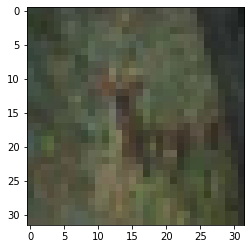

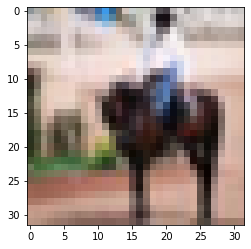

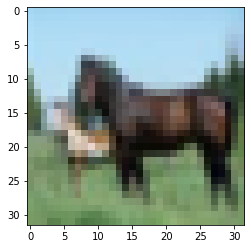

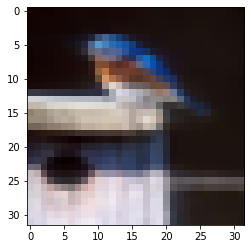

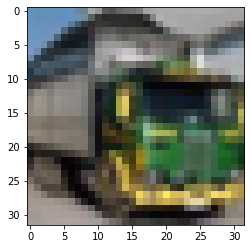

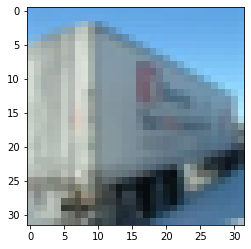

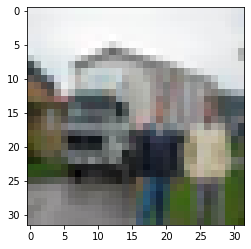

In [71]:
a = [10,11,12,13,14,15,16]
for i in a:
    from matplotlib import pyplot as plt
    plt.imshow(x_train[i], interpolation='nearest')
    plt.show()


In [72]:
# Convert class vectors to binary class matrices.

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [73]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [74]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
x_test.shape

(10000, 32, 32, 3)

In [94]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [77]:
#Constructing the model:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [87]:
x_test.shape

(10000, 32, 32, 3)

In [88]:
X_train= x_train.reshape(x_train.shape[0], 32 * 32 * 3) # New dimension becomes 50000 x 3072
X_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3) # New dimension becomes 10000 x 3072

In [89]:
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [57]:
#Building the model:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
model = Sequential()
model.add(Dense(128, init='uniform', activation='relu', input_shape=X_train[1].shape))
model.add(Dropout(0.2))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,init='uniform',activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.2))

C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", input_shape=(3072,), kernel_initializer="uniform")`
  
C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="sigmoid", kernel_initializer="uniform")`
  


In [102]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=20,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 11s - loss: 0.5963 - accuracy: 0.8907 - val_loss: 0.3233 - val_accuracy: 0.9000
Epoch 2/20
 - 10s - loss: 0.5603 - accuracy: 0.8999 - val_loss: 0.3013 - val_accuracy: 0.9000
Epoch 3/20
 - 10s - loss: 0.5491 - accuracy: 0.8998 - val_loss: 0.2873 - val_accuracy: 0.9000
Epoch 4/20
 - 9s - loss: 0.5420 - accuracy: 0.8997 - val_loss: 0.2808 - val_accuracy: 0.9000
Epoch 5/20
 - 11s - loss: 0.5302 - accuracy: 0.8999 - val_loss: 0.2716 - val_accuracy: 0.9001
Epoch 6/20
 - 11s - loss: 0.5341 - accuracy: 0.9001 - val_loss: 0.2668 - val_accuracy: 0.9006
Epoch 7/20
 - 9s - loss: 0.5288 - accuracy: 0.9007 - val_loss: 0.2636 - val_accuracy: 0.9002
Epoch 8/20
 - 9s - loss: 0.5213 - accuracy: 0.9018 - val_loss: 0.2556 - val_accuracy: 0.9005
Epoch 9/20
 - 9s - loss: 0.5173 - accuracy: 0.9022 - val_loss: 0.2520 - val_accuracy: 0.9020
Epoch 10/20
 - 9s - loss: 0.5195 - accuracy: 0.9028 - val_loss: 0.2527 - val_accuracy: 0.9015
Epoch 11/20
 -

In [104]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2345812178850174
Test accuracy: 0.908620297908783
